### Problem Statemant

#### Breast Cancer Prediction: Whether the breast cancer is Benign(Non cancerous) or Malignant(Cancerous).

### Importing libraries

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Loading the Data

In [49]:
cancer = pd.read_csv('cancer.csv', index_col= 0, header=0)

### Data EDA

In [50]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [51]:
cancer.shape

(569, 31)

In [52]:
cancer.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

#### Data Statistics

In [98]:
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


**Checking for Missing Value**

In [53]:
cancer.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Data Visualization

In [93]:
cancer.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

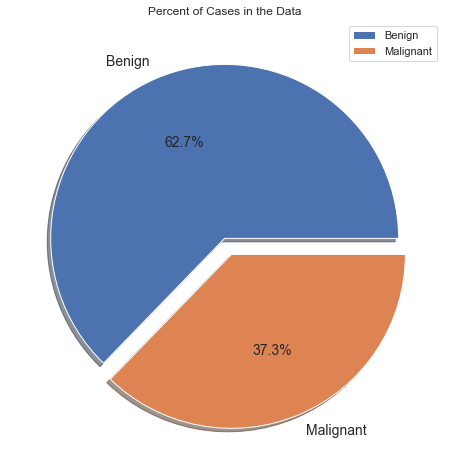

In [94]:
# Pie chart representation
pie_labels = ['Benign', 'Malignant']

#Number of benign and malignant cases
pie_y = cancer['diagnosis'].value_counts()

pie_explode = [0, 0.1]

plt.figure(figsize=(10, 8))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
plt.legend()
plt.title("Percent of Cases in the Data")
plt.show()

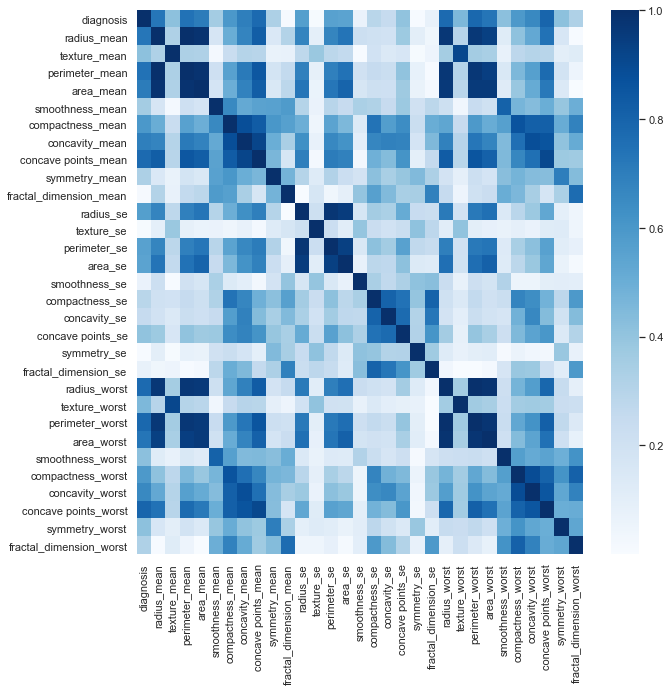

In [95]:
# Now, let's see correlation graph by using Heat Map
correlation = cancer.corr().abs()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cmap = 'Blues', annot_kws={"size": 12})
plt.show()

### Data Pre-processing

In [91]:
from sklearn.preprocessing import LabelEncoder
colname = ['diagnosis']

le = LabelEncoder()
for x in colname:
    cancer[x] = le.fit_transform(cancer[x])

In [96]:
cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [97]:
cancer.dtypes

diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

### Create X & Y

In [82]:
X = cancer.values[:,1:]
Y = cancer.values[:,1]
Y = Y.astype('int')

In [83]:
X.shape

(569, 30)

In [84]:
Y.shape

(569,)

### Treating Imbalance Data

In [62]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=0)
X_train_SMOTE, Y_train_SMOTE = smt.fit_sample(X,Y)

In [64]:
pd.DataFrame(Y_train_SMOTE).value_counts()

0    357
1    357
dtype: int64

### Spliting Data into training & testing

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_train_SMOTE,Y_train_SMOTE, test_size = 0.3, random_state = 10)

### Scaling Data 

In [66]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)
print(X_train)

[[ 0.21100592 -0.13854812  0.36212998 ...  1.27288926  2.049655
   1.15412943]
 [ 0.49520826 -0.18909832  0.4496581  ...  0.19259189 -0.16951924
  -0.77426064]
 [-0.62569685  1.00772642 -0.63617372 ... -0.16900432 -0.25233818
   0.63231796]
 ...
 [-0.70054567 -1.81572877 -0.72960719 ... -0.3350863   0.20838491
  -0.50426155]
 [-0.29689672 -0.62360324 -0.36130097 ... -1.17999064 -1.00182433
  -0.73807871]
 [ 1.54224549  2.73317125  1.47092555 ...  0.55420723 -0.18420307
  -0.14726267]]


### Logistic Regression Model

In [88]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0]


In [89]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[106   2]
 [  1 106]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.98      0.99      0.99       107

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215

Accuracy of the model:  0.986046511627907


### Decision Tree Model

In [69]:
#predicting using the Decision_Tree_Classifier
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion="entropy",random_state=10, min_samples_leaf= 2, max_depth = 5)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
#print(Y_pred)
#print(list(zip(Y_test,Y_pred)))

In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[100   8]
 [  2 105]]
Classification report: 
              precision    recall  f1-score   support

           0       0.98      0.93      0.95       108
           1       0.93      0.98      0.95       107

    accuracy                           0.95       215
   macro avg       0.95      0.95      0.95       215
weighted avg       0.95      0.95      0.95       215

Accuracy of the model:  0.9534883720930233


### Random Forest Model

In [71]:
#predicting using the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

model_RandomForestClassifier=RandomForestClassifier(n_estimators=100, random_state=10)

#fit the model on the data and predict the values
model_RandomForestClassifier.fit(X_train,Y_train)

Y_pred=model_RandomForestClassifier.predict(X_test)

In [72]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[105   3]
 [  0 107]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      0.97      0.99       108
           1       0.97      1.00      0.99       107

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215

Accuracy of the model:  0.986046511627907


### KNN Model

In [73]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5,
metric='manhattan')
#fit the model on the data and predict the values
model_KNN.fit(X_train,Y_train)

Y_pred=model_KNN.predict(X_test)

In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[106   2]
 [  1 106]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.98      0.99      0.99       107

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215

Accuracy of the model:  0.986046511627907


### Voting Classifier Model

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

# create the sub models
estimators = []
model1 = LogisticRegression()
estimators.append(('log', model1))
model2 = DecisionTreeClassifier(criterion='gini',random_state=10)
estimators.append(('cart', model2))
model3 = SVC(kernel="rbf", C=100,gamma=0.1)
estimators.append(('svm', model3))
model4 = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
estimators.append(('knn', model4))


# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
Y_pred=ensemble.predict(X_test)
print(Y_pred)

[1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 1 1 1 1 1 1
 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 0 0 0
 1 1 1 0 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 0 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 0]


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)

print('Classification report: ')

print(classification_report(Y_test, Y_pred))

acc = accuracy_score(Y_test, Y_pred)
print('Accuracy of the model: ', acc)

[[106   2]
 [  1 106]]
Classification report: 
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.98      0.99      0.99       107

    accuracy                           0.99       215
   macro avg       0.99      0.99      0.99       215
weighted avg       0.99      0.99      0.99       215

Accuracy of the model:  0.986046511627907


### All Model Accuracy

In [100]:
def data_training(X_train, X_test, Y_train, Y_test):

    models = []
    models.append(('LOGR',classifier))
    models.append(('KNN',model_KNN))
    models.append(('CART',model_DecisionTree))
    models.append(('RF',model_RandomForestClassifier))
    models.append(('VotingClassifier',ensemble))
    df_result = pd.DataFrame(columns=["model","accuracy_score","scale_method","weighted_avg_precision","weighted_avg_recall",
                                     "weighted_avg_f1-score"])
    index = 0
    for name,model in models:
        model.fit(X_train,Y_train)
        Y_pred = model.predict(X_test)
        score = accuracy_score(Y_test,Y_pred)
        class_report = classification_report(Y_test,Y_pred,digits=2,output_dict=True)
        weighted_avg = class_report['weighted avg']
    
        df_result.at[index,['model','accuracy_score','scale_method',"weighted_avg_precision","weighted_avg_recall",
                                     "weighted_avg_f1-score"]] = [name,score,"NA",weighted_avg['precision'],
                                                                  weighted_avg['recall'],weighted_avg['f1-score']]
        index += 1
    return df_result.sort_values("accuracy_score",ascending=False)

In [101]:
training_result = data_training(X_train, X_test, Y_train, Y_test)
training_result

,model,accuracy_score,scale_method,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1-score
4,VotingClassifier,0.990698,NA,0.990698,0.990698,0.990698
0,LOGR,0.986047,NA,0.986089,0.986047,0.986047
1,KNN,0.986047,NA,0.986089,0.986047,0.986047
3,RF,0.986047,NA,0.986427,0.986047,0.986045
2,CART,0.953488,NA,0.954917,0.953488,0.953458


### Conclusion

**This is an analysis of the Breast Cancer (Diagnostic) DataSet,We are going to 
 analyze it and to try several machine learning classification models to compare their results. The 
 best modelfound is based on Voting Classifier model and reaches a accuracy 99.06% of  with a F1 score of 0.99**

### Thank You